## 3D Houses - Plot a single shape file

Import the necessary libraries

In [1]:
import os
import sys

In [2]:
sys.executable

'C:\\Users\\ecebo\\anaconda3\\envs\\houses_3d\\python.exe'

In [3]:
import rasterio
import fiona
import geopandas
import gdal

import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.mplot3d import Axes3D

In [103]:
import numpy as np

Dataset path

In [4]:
data_main_folder_path = os.path.abspath("./data/")

selected_DTM_folder_name = 'DHMVIIDTMRAS1m_k01'
selected_DSM_folder_name = 'DHMVIIDSMRAS1m_k01'

DHM_folder_name = 'DHMVII_vdc_k01'
GeoTIFF_folder_name = 'GeoTIFF'

In [5]:
# DSM TIFF file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, GeoTIFF_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[0]
file_path = os.path.join(folder_path, file_name)

In [6]:
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\GeoTIFF\\DHMVIIDSMRAS1m_k01.tif'

In [7]:
from rasterio.plot import show

In [84]:
img = rasterio.open('zip+file:///C:/Users/ecebo/MyRepos//3D_houses/Data/DHMVIIDSMRAS1m_k01.zip!/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')



RasterioIOError: '/vsizip//C:/Users/ecebo/MyRepos//3D_houses/Data/DHMVIIDSMRAS1m_k01.zip/GeoTIFF/DHMVIIDSMRAS1m_k01.tif' does not exist in the file system, and is not recognized as a supported dataset name.

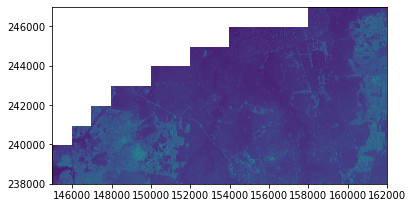

<AxesSubplot:>

In [8]:
img = rasterio.open(file_path)
rasterio.plot.show(img)

In [9]:
print(img.count)
print(img.height, img.width)
print(img.crs)

1
9000 17000
EPSG:31370


In [198]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [80]:
help(img.crs.get)

Help on method get in module collections.abc:

get(key, default=None) method of rasterio.crs.CRS instance
    D.get(k[,d]) -> D[k] if k in D, else d.  d defaults to None.



In [10]:
img.crs.wkt

'PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]'

In [161]:
img.transform

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [127]:
transform_array = np.array([[img.transform.a,img.transform.b,img.transform.c],[img.transform.d,img.transform.e,img.transform.f],[img.transform.g,img.transform.h,img.transform.i]])
transform_array

array([[ 1.00e+00,  0.00e+00,  1.45e+05],
       [ 0.00e+00, -1.00e+00,  2.47e+05],
       [ 0.00e+00,  0.00e+00,  1.00e+00]])

In [126]:
transform_inverted = np.linalg.inv(transform_array)
transform_inverted

array([[ 1.00e+00,  0.00e+00, -1.45e+05],
       [-0.00e+00, -1.00e+00,  2.47e+05],
       [ 0.00e+00,  0.00e+00,  1.00e+00]])

In [125]:
coordinates = np.array([145000.0,238000.0,1])

transform_inverted*coordinates.transpose()

array([[ 1.45e+05,  0.00e+00, -1.45e+05],
       [-0.00e+00, -2.38e+05,  2.47e+05],
       [ 0.00e+00,  0.00e+00,  1.00e+00]])

In [87]:
img.transform.determinant

-1.0

In [139]:
help(rasterio.transform)


Help on module rasterio.transform in rasterio:

NAME
    rasterio.transform - Geospatial transforms

CLASSES
    builtins.object
        TransformMethodsMixin
    
    class TransformMethodsMixin(builtins.object)
     |  Mixin providing methods for calculations related
     |  to transforming between rows and columns of the raster
     |  array and the coordinates.
     |  
     |  These methods are wrappers for the functionality in
     |  `rasterio.transform` module.
     |  
     |  A subclass with this mixin MUST provide a `transform`
     |  property.
     |  
     |  Methods defined here:
     |  
     |  index(self, x, y, op=<built-in function floor>, precision=None)
     |      Returns the (row, col) index of the pixel containing (x, y) given a
     |      coordinate reference system.
     |      
     |      Use an epsilon, magnitude determined by the precision parameter
     |      and sign determined by the op function:
     |          positive for floor, negative for ceil.


In [166]:
img.transform.TransformMethodsMixin.index()

AttributeError: 'Affine' object has no attribute 'TransformMethodsMixin'

In [158]:
help(rasterio.transform.TransformMethodsMixin.index)

Help on function index in module rasterio.transform:

index(self, x, y, op=<built-in function floor>, precision=None)
    Returns the (row, col) index of the pixel containing (x, y) given a
    coordinate reference system.
    
    Use an epsilon, magnitude determined by the precision parameter
    and sign determined by the op function:
        positive for floor, negative for ceil.
    
    Parameters
    ----------
    x : float
        x value in coordinate reference system
    y : float
        y value in coordinate reference system
    op : function, optional (default: math.floor)
        Function to convert fractional pixels to whole numbers (floor,
        ceiling, round)
    precision : int, optional (default: None)
        Decimal places of precision in indexing, as in `round()`.
    
    Returns
    -------
    tuple
        (row index, col index)



In [189]:
print(rasterio.transform.TransformMethodsMixin.index(img, 145000.0, 247000.0)) # left top
print(rasterio.transform.TransformMethodsMixin.index(img, 145000.0, 238000.0)) # left bottom
print(rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 247000.0)) # right top
print(rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 238000.0)) # right bottom
print('\n')
print(rasterio.transform.TransformMethodsMixin.index(img, 150000.0, 244000.0))

(0, 0)
(9000, 0)
(0, 17000)
(9000, 17000)


(3000, 5000)


In [12]:
print(img.nodatavals)
img.nodata

(-9999.0,)


-9999.0

In [81]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [14]:
mask = img.read_masks(1)


In [17]:
print(img.colormap)

<built-in method colormap of DatasetReader object at 0x000002228CADAD48>


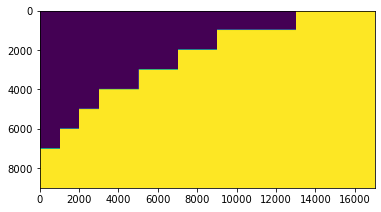

In [18]:
plt.imshow(mask)
plt.show()

In [19]:
layer = img.read(1)

In [59]:
layer.shape

(9000, 17000)

In [20]:
layer

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

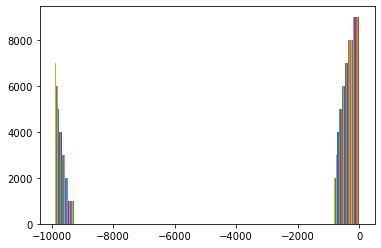

In [21]:
plt.hist(layer)
plt.show()

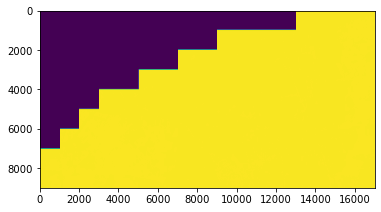

In [22]:
plt.imshow(layer)
plt.show()

In [53]:
layer_slice.shape

(200, 100)

In [197]:
print(X.shape)
print(Y.shape)

(200, 100)
(200, 100)


In [194]:
y

range(0, 200)

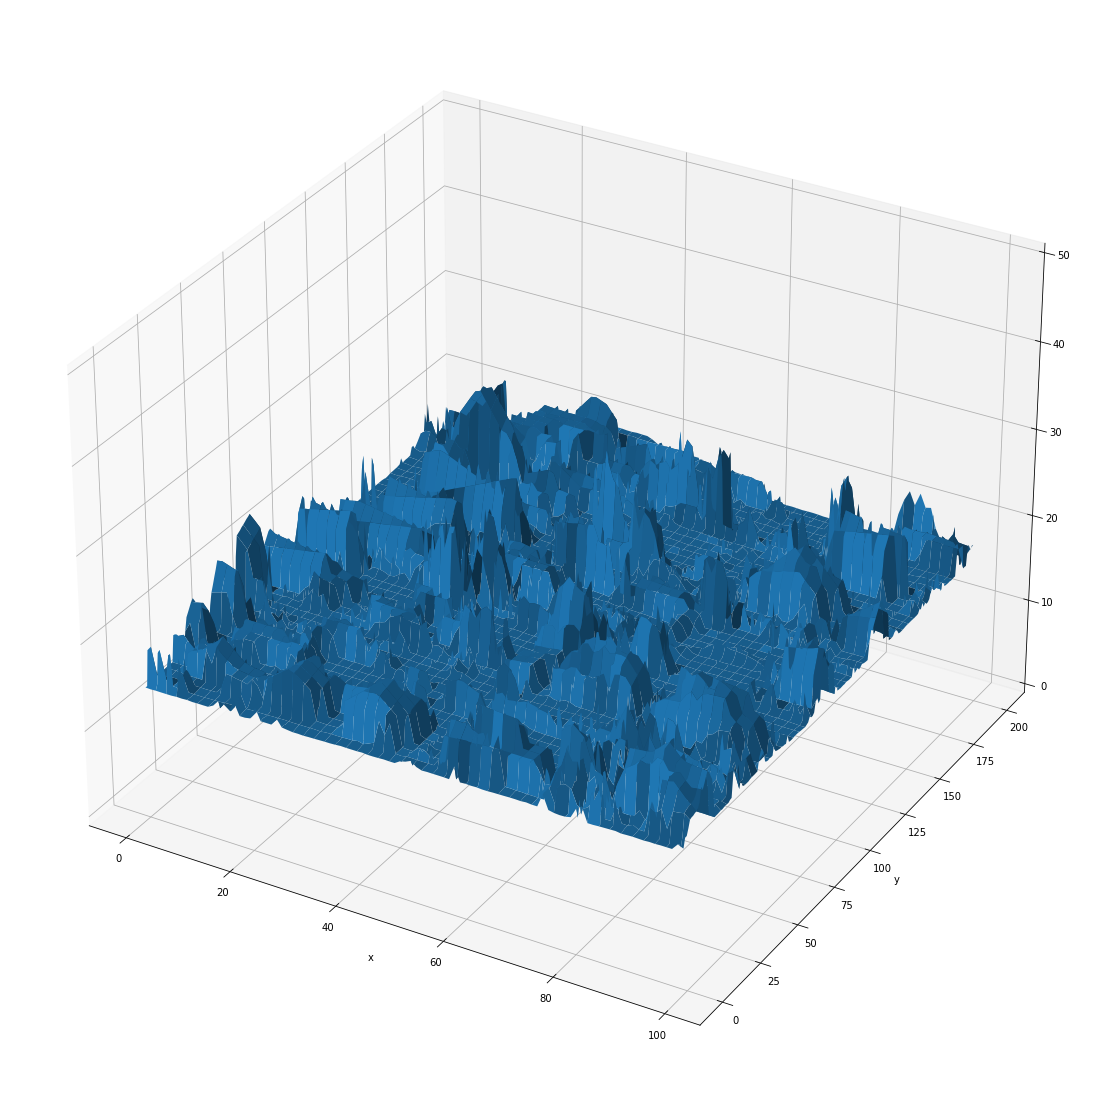

In [191]:
# Plot a subset of the layer as a 3D image
layer_slice = layer[7000:7200,11000:11100]



nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [45]:
map_transform = img.get_transform()
map_transform

[145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0]

In [46]:
map_shape = img.shape
map_shape

(9000, 17000)

In [47]:
xMin = map_transform[0]
yMin = map_transform[3]
xMax = xMin + map_shape[1] / map_transform[1]
yMax = yMin + map_shape[0] / map_transform[5]
xMin, yMin, xMax, yMax

(145000.0, 247000.0, 162000.0, 238000.0)

In [27]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [206]:
rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 238000.0)

(9000, 17000)

In [61]:
layers = img.read()
layers

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [29]:
layers.shape

(1, 9000, 17000)

In [30]:
img_gdal = gdal.Open(file_path, gdal.GA_ReadOnly) 

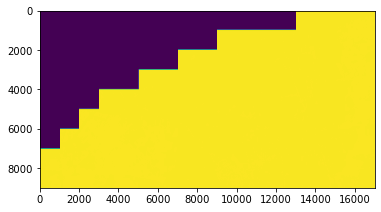

In [31]:
band = img_gdal.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [32]:
print(img_gdal.RasterCount, img_gdal.RasterXSize, img_gdal.RasterYSize)
img_gdal.GetLayer(0)

1 17000 9000


In [33]:
# Read from within zip file
# zip:///var/data/example.zip!example.tif

In [34]:
# Shape file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, DHM_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[4]
file_path = os.path.join(folder_path, file_name)
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\DHMVII_vdc_k01\\DHMVII_vdc_k01.shp'

In [35]:
# Read shape file
shapes_gp = geopandas.read_file(file_path)
shapes_gp

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


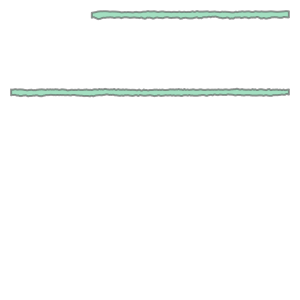

In [205]:
shapes_gp.geometry[2]

In [36]:
# Read directly from zip
zipfile = "zip:///C:/Users\ecebo\MyRepos\3D_houses\Data\DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01.zip"
shapes_gp_zip = geopandas.read_file(zipfile)


DriverError: '/vsizip//C:/Users\ecebo\MyReposD_houses\Data\DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01.zip' does not exist in the file system, and is not recognized as a supported dataset name.

In [184]:
shapes_gp.

<bound method DataFrame.info of    Id   OpnDatum1   OpnDatum2  \
0   0  2013-02-20        None   
1   0  2013-04-01        None   
2   0  2013-02-20  2013-04-01   

                                            geometry  
0  MULTIPOLYGON Z (((162079.010 238604.770 0.000,...  
1  POLYGON Z ((148803.300 243432.780 0.000, 14882...  
2  MULTIPOLYGON Z (((156554.470 243736.800 0.000,...  >

<AxesSubplot:>

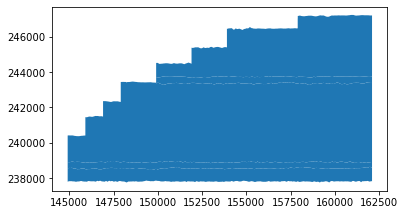

In [176]:
shapes_gp.plot()

In [177]:
shapes_gp.

<Projected CRS: PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["B ...>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [178]:
help(geopandas.tools.geocode)

Help on function geocode in module geopandas.tools.geocoding:

geocode(strings, provider=None, **kwargs)
    Geocode a set of strings and get a GeoDataFrame of the resulting points.
    
    Parameters
    ----------
    strings : list or Series of addresses to geocode
    provider : str or geopy.geocoder
        Specifies geocoding service to use. If none is provided,
        will use 'geocodefarm' with a rate limit applied (see the geocodefarm
        terms of service at:
        https://geocode.farm/geocoding/free-api-documentation/ ).
    
        Either the string name used by geopy (as specified in
        geopy.geocoders.SERVICE_TO_GEOCODER) or a geopy Geocoder instance
        (e.g., geopy.geocoders.GeocodeFarm) may be used.
    
        Some providers require additional arguments such as access keys
        See each geocoder's specific parameters in geopy.geocoders
    
    Notes
    -----
    Ensure proper use of the results by consulting the Terms of Service for
    your pro

In [179]:
df = geopandas.tools.geocode(["boston, ma", "1600 pennsylvania ave. washington, dc"])

GeocoderNotFound: Unknown geocoder 'geocodefarm'; options are: dict_keys(['algolia', 'arcgis', 'azure', 'baidu', 'baiduv3', 'banfrance', 'bing', 'databc', 'geocodeearth', 'geocodio', 'geonames', 'google', 'googlev3', 'geolake', 'here', 'herev7', 'ignfrance', 'mapbox', 'mapquest', 'maptiler', 'nominatim', 'opencage', 'openmapquest', 'pickpoint', 'pelias', 'photon', 'liveaddress', 'tomtom', 'what3words', 'what3wordsv3', 'yandex'])

In [180]:
help(fiona)

Help on package fiona:

NAME
    fiona - Fiona is OGR's neat, nimble API.

DESCRIPTION
    Fiona provides a minimal, uncomplicated Python interface to the open
    source GIS community's most trusted geodata access library and
    integrates readily with other Python GIS packages such as pyproj, Rtree
    and Shapely.
    
    How minimal? Fiona can read features as mappings from shapefiles or
    other GIS vector formats and write mappings as features to files using
    the same formats. That's all. There aren't any feature or geometry
    classes. Features and their geometries are just data.
    
    A Fiona feature is a Python mapping inspired by the GeoJSON format. It
    has `id`, 'geometry`, and `properties` keys. The value of `id` is
    a string identifier unique within the feature's parent collection. The
    `geometry` is another mapping with `type` and `coordinates` keys. The
    `properties` of a feature is another mapping corresponding to its
    attribute table. For examp

In [181]:
file = fiona.open(os.path.join(data_selected_folder_path,'DHMVII_vdc_k01.shp'))

NameError: name 'data_selected_folder_path' is not defined

In [182]:
file.__dict__


NameError: name 'file' is not defined